In [47]:
# Libraries
import pandas as pd
import numpy as np
# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
# warnings
import warnings
warnings.filterwarnings('ignore')
# Machine Learning
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_curve, auc
from sklearn.ensemble import RandomForestClassifier


In [48]:
df = pd.read_csv('/content/sample_data/creditcard.csv')

In [49]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [50]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [51]:
df.isnull().sum()            # To check missing values in each column

,0
Time,0
V1,0
V2,0
V3,0
V4,0
V5,0
V6,0
V7,0
V8,0
V9,0


In [52]:
df.fillna(df.mean(), inplace=True)
# fillna --- replaces missing values in data set
# mean   --- calculates mean of each numaric column
# inplace=True --- modifies DataFrame directly instead of Creating a copy

In [53]:
print(df.columns.to_list())

['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9', 'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18', 'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27', 'V28', 'Amount', 'Class']


In [54]:
X = df.drop(['Time', 'Class'], axis=1)    # Time col is not useful for fraud detection
y = df['Class']                           # Class is a Dependent variable

In [55]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# 20% data is used for test set & 80% is used for train set
# train set is used to fit the model & learn patterns
# test set is used to evaluate model proformance/predict the unseen data

In [56]:
X_train.shape

(227845, 29)

In [57]:
X_test.shape

(56962, 29)

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [59]:
print(pd.Series(y_test).value_counts(normalize=True))

Class
0    0.99828
1    0.00172
Name: proportion, dtype: float64


In [60]:
model = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=5 , random_state=42)

In [61]:
cv_score = cross_val_score(model, X_train_scaled, y_train, cv=5, scoring='f1')

In [62]:
print("Cross Validation Scores: ", cv_score)
print("Mean Cross Validation Score: ", np.mean(cv_score))

Cross Validation Scores:  [0.83221477 0.82352941 0.82014388 0.86111111 0.87837838]
Mean Cross Validation Score:  0.8430755102493906


In [63]:
model.fit(X_train_scaled, y_train)

RandomForestClassifier(max_depth=10, min_samples_split=5, random_state=42)

In [64]:
y_pred = model.predict(X_test_scaled)

In [65]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00     56864
           1       0.97      0.76      0.85        98

    accuracy                           1.00     56962
   macro avg       0.99      0.88      0.93     56962
weighted avg       1.00      1.00      1.00     56962



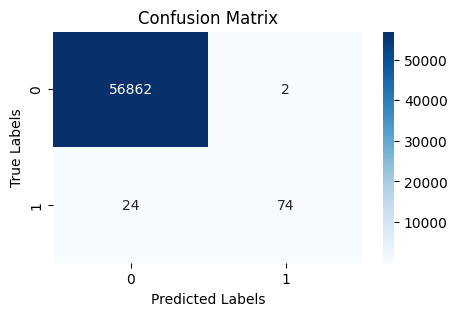

In [66]:
plt.figure(figsize=(5,3))
cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [67]:
importance = model.feature_importances_       #- Works with models like Random Forest, XGBoost, or Gradient Boosting
feature = pd.DataFrame({
    'feature': X_train.columns,
    'importance': importance
}).sort_values('importance', ascending= False)

In [68]:
feature.head()

,feature,importance
16,V17,0.165189
11,V12,0.140179
13,V14,0.127036
15,V16,0.089585
9,V10,0.088747


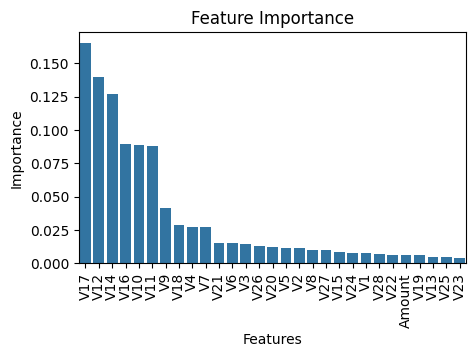

In [69]:
plt.figure(figsize=(5,3))
sns.barplot(x='feature', y='importance', data=feature)
plt.title('Feature Importance')
plt.xticks(rotation=90)  # to rotate x-axis labels
plt.xlabel('Features')
plt.ylabel('Importance')
plt.show()

In [70]:
y_pred_probability = model.predict_proba(X_test_scaled)[:,1]
fpr, tpr, thresholds = roc_curve(y_test, y_pred_probability)
roc_auc = auc(fpr,tpr)

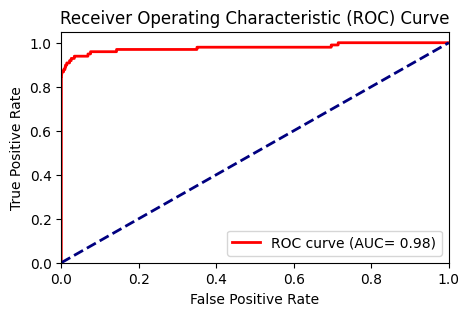

In [71]:
plt.figure(figsize=(5,3))
plt.plot(fpr,tpr, color='red',lw=2, label=f'ROC curve (AUC= {roc_auc:.2f})')
plt.plot([0,1],[0,1], color='navy', lw=2, linestyle='--')
plt.legend(loc='lower right')
plt.xlim([0.0,1.0])
plt.ylim([0.0,1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.show()